<a href="https://colab.research.google.com/github/aozdl/Random-Forest-Project/blob/main/Random_Forest_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTS

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn import tree
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.ensemble import RandomForestClassifier
from pickle import dump

In [ ]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
data = pd.read_csv(url)

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
X = data.drop("Outcome", axis = 1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [ ]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

[Text(0.4527730855855856, 0.9642857142857143, 'BMI <= 29.15\ngini = 0.449\nsamples = 383\nvalue = [405, 209]\nclass = 0'),
 Text(0.17004504504504506, 0.8928571428571429, 'DiabetesPedigreeFunction <= 1.12\ngini = 0.186\nsamples = 150\nvalue = [224, 26]\nclass = 0'),
 Text(0.08783783783783784, 0.8214285714285714, 'Age <= 27.5\ngini = 0.165\nsamples = 144\nvalue = [220, 22]\nclass = 0'),
 Text(0.018018018018018018, 0.75, 'BMI <= 22.75\ngini = 0.041\nsamples = 82\nvalue = [142, 3]\nclass = 0'),
 Text(0.009009009009009009, 0.6785714285714286, 'gini = 0.0\nsamples = 25\nvalue = [51, 0]\nclass = 0'),
 Text(0.02702702702702703, 0.6785714285714286, 'DiabetesPedigreeFunction <= 0.396\ngini = 0.062\nsamples = 57\nvalue = [91, 3]\nclass = 0'),
 Text(0.018018018018018018, 0.6071428571428571, 'gini = 0.0\nsamples = 34\nvalue = [54, 0]\nclass = 0'),
 Text(0.036036036036036036, 0.6071428571428571, 'DiabetesPedigreeFunction <= 0.405\ngini = 0.139\nsamples = 23\nvalue = [37, 3]\nclass = 0'),
 Text(0.027

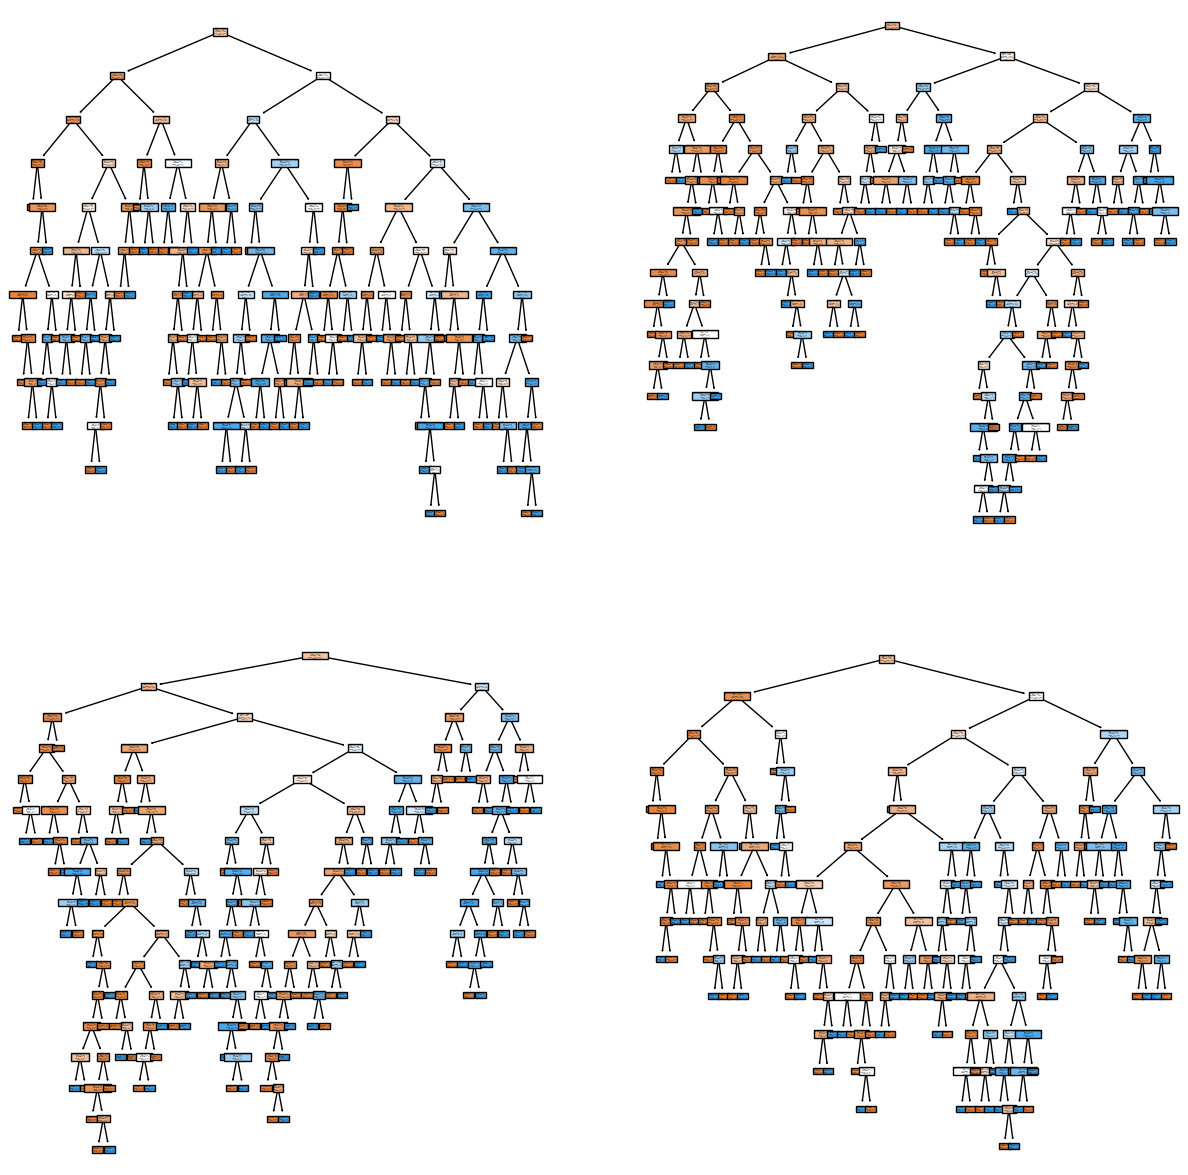

In [ ]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

In [ ]:
y_train_pred = model.predict(X_train)
y_train_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
accuracy_score(y_train,y_train_pred)

1.0

In [ ]:
accuracy_score(y_test, y_pred)

0.7207792207792207

In [ ]:
f1_score(y_test, y_pred)

0.6126126126126126

In [ ]:
# Set up grid search
param_grid = {
     'n_estimators':[20,50],
     'max_depth':[3,4,5],
     'min_samples_leaf':[1,2,3,4,5],
     'min_samples_split':[2,3,4,5],
     'max_features':[3,4,5,6,7]
}

# Perform grid search
rand_search = GridSearchCV(RandomForestClassifier(n_jobs= -1),param_grid, cv=3)
rand_out = rand_search.fit(X_train, y_train)
#rand_search.fit(X_train, y_train)

# Print best parameters
print(f"Best Parameters: {rand_search.best_params_}")

Best Parameters: {'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}


In [ ]:
best = rand_out.best_estimator_

best

RandomForestClassifier(max_depth=4, max_features=7, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=50, n_jobs=-1)

In [ ]:
y_train_pred = best.predict(X_train)
y_test_pred = best.predict(X_test)

In [ ]:
accuracy_score(y_train,y_train_pred)

0.8469055374592834

In [ ]:
accuracy_score(y_test, y_test_pred)

0.7402597402597403

In [ ]:
f1_score(y_test, y_test_pred)

0.6363636363636364

In [ ]:
f1_score(y_train, y_train_pred)

0.7673267326732673

[Text(0.5340909090909091, 0.9, 'Glucose <= 157.5\ngini = 0.457\nsamples = 388\nvalue = [397, 217]\nclass = 0'),
 Text(0.25, 0.7, 'BMI <= 30.95\ngini = 0.391\nsamples = 332\nvalue = [387, 141]\nclass = 0'),
 Text(0.09090909090909091, 0.5, 'Glucose <= 104.0\ngini = 0.22\nsamples = 166\nvalue = [236, 34]\nclass = 0'),
 Text(0.045454545454545456, 0.3, 'gini = 0.0\nsamples = 73\nvalue = [116, 0]\nclass = 0'),
 Text(0.13636363636363635, 0.3, 'DiabetesPedigreeFunction <= 0.214\ngini = 0.344\nsamples = 93\nvalue = [120, 34]\nclass = 0'),
 Text(0.09090909090909091, 0.1, 'gini = 0.0\nsamples = 27\nvalue = [48, 0]\nclass = 0'),
 Text(0.18181818181818182, 0.1, 'gini = 0.436\nsamples = 66\nvalue = [72, 34]\nclass = 0'),
 Text(0.4090909090909091, 0.5, 'Age <= 35.5\ngini = 0.485\nsamples = 166\nvalue = [151, 107]\nclass = 0'),
 Text(0.3181818181818182, 0.3, 'BloodPressure <= 51.0\ngini = 0.437\nsamples = 108\nvalue = [120, 57]\nclass = 0'),
 Text(0.2727272727272727, 0.1, 'gini = 0.337\nsamples = 8\nv

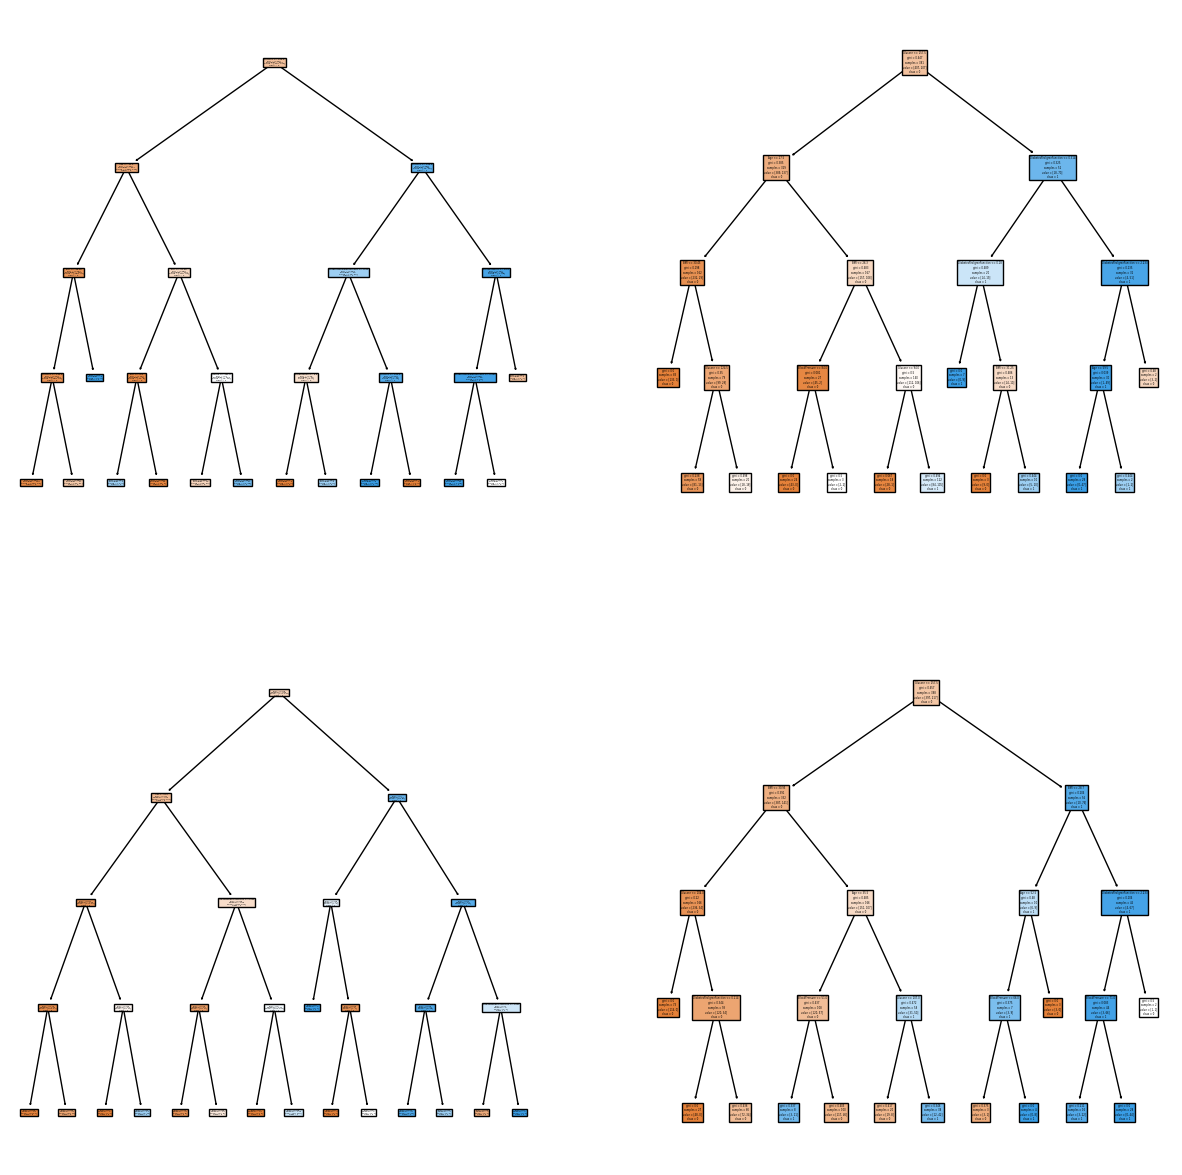

In [ ]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(best.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(best.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(best.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(best.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

In [ ]:
dump(model, open("random_forest_classifier_default_42.sav", "wb"))